In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [4]:
!head nso_fd_counts.log

Thu Jun  3 21:51:39 EDT 2021,   ncs, 225
Thu Jun  3 21:51:39 EDT 2021,  java, 190
Thu Jun  3 21:51:39 EDT 2021,python, 187
Thu Jun  3 21:52:40 EDT 2021,   ncs, 225
Thu Jun  3 21:52:40 EDT 2021,  java, 190
Thu Jun  3 21:52:40 EDT 2021,python, 187
Thu Jun  3 21:53:41 EDT 2021,   ncs, 0
Thu Jun  3 21:53:41 EDT 2021,  java, 0
Thu Jun  3 21:53:41 EDT 2021,python, 0
Thu Jun  3 21:55:08 EDT 2021,   ncs, 0


In [5]:
!awk '/ncs/' nso_fd_counts.log > 1.log
!awk '/java/' nso_fd_counts.log > 2.log
!awk '/python/' nso_fd_counts.log > 3.log

In [22]:
df = pd.read_csv('3.log', sep=',', engine='python', header=None, skipinitialspace=True)

df.head()

,0,1,2
0,Thu Jun 3 21:51:39 EDT 2021,python,187
1,Thu Jun 3 21:52:40 EDT 2021,python,187
2,Thu Jun 3 21:53:41 EDT 2021,python,0
3,Thu Jun 3 21:59:10 EDT 2021,python,187
4,Thu Jun 3 22:00:10 EDT 2021,python,187


In [23]:
#df['date'] = df[0] + ":" + df[1].apply(str) + ":" + df[2]
df = df.rename(columns = {0: 'date'})
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df.rename(columns = {2:'num'})
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8244 entries, 0 to 8243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype                                 
---  ------  --------------  -----                                 
 0   date    8244 non-null   datetime64[ns, pytz.FixedOffset(-240)]
 1   1       8244 non-null   object                                
 2   num     8244 non-null   int64                                 
dtypes: datetime64[ns, pytz.FixedOffset(-240)](1), int64(1), object(1)
memory usage: 193.3+ KB


In [24]:
df.head()

,date,1,num
0,2021-06-03 21:51:39-04:00,python,187
1,2021-06-03 21:52:40-04:00,python,187
2,2021-06-03 21:53:41-04:00,python,0
3,2021-06-03 21:59:10-04:00,python,187
4,2021-06-03 22:00:10-04:00,python,187


<AxesSubplot:xlabel='date'>

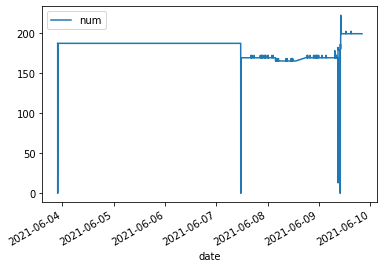

In [25]:
df.plot.line(x='date', y='num')

In [26]:
df['num'].describe()

count    8244.000000
mean      182.084668
std        10.564516
min         0.000000
25%       169.000000
50%       187.000000
75%       187.000000
max       222.000000
Name: num, dtype: float64

In [27]:
df['num'].value_counts()

187    5113
169    1848
199     589
165     556
179      65
172      36
168      13
180       7
202       4
0         3
186       1
178       1
84        1
204       1
13        1
208       1
166       1
182       1
190       1
222       1
Name: num, dtype: int64

In [28]:
df_mod=df[df['num'].between(100, 300)]
#df_mod=df[df['num'].between(1, 455)]

df_mod['num'].describe()

count    8239.000000
mean      182.183396
std         9.744477
min       165.000000
25%       169.000000
50%       187.000000
75%       187.000000
max       222.000000
Name: num, dtype: float64

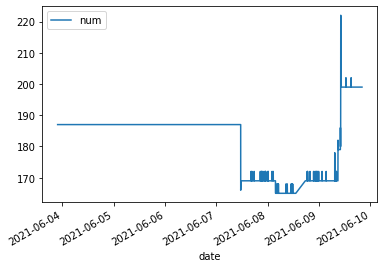

In [29]:
p = df_mod.plot.line(x='date', y='num')

In [165]:
p.get_figure().savefig('myfile.pdf')